<a href="https://colab.research.google.com/github/keerthika-27/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load raw data from csv file

In [3]:
path = '/gdrive/My Drive/Online MLCC : Oct 2021/Data/Classwork/'

In [4]:
raw_data = pd.read_csv(path + 'Chennai_house_univariate.csv')
raw_data.head()

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000


Plot raw data and see the data distribution

Text(0, 0.5, 'Price in lakhs')

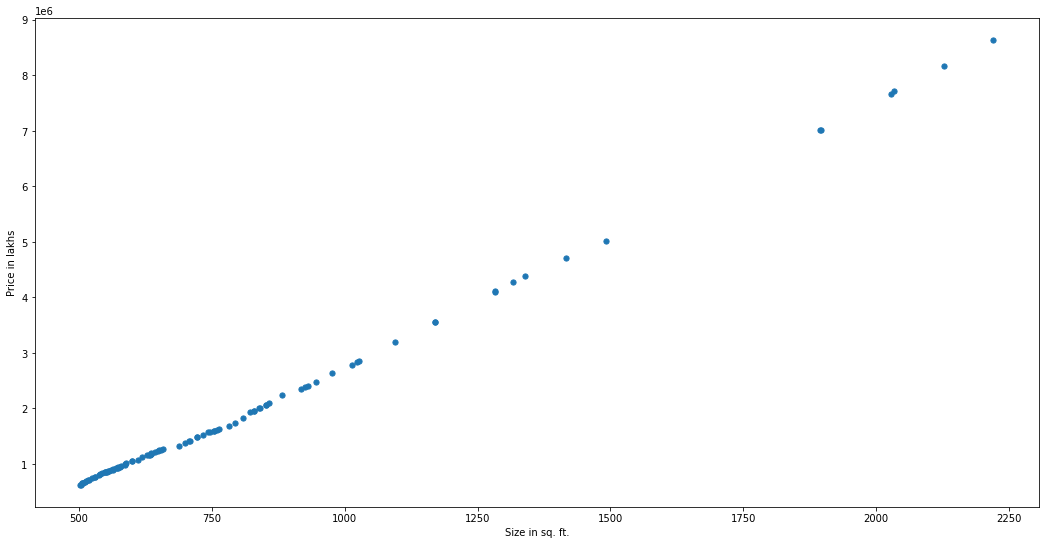

In [5]:
# s is the dot size
raw_data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize = (18,9), s=27)
plt.xlabel('Size in sq. ft.')
plt.ylabel('Price in lakhs')

Data preprocessing - Mean normalization

In [6]:
# Data preprocessing
data = (raw_data - raw_data.mean()) / (raw_data.max() - raw_data.min())
data.head()

,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922
2,0.020808,0.008636
3,0.066977,0.052331
4,-0.153242,-0.141177


Plot normalized data - distribution hasn't changed

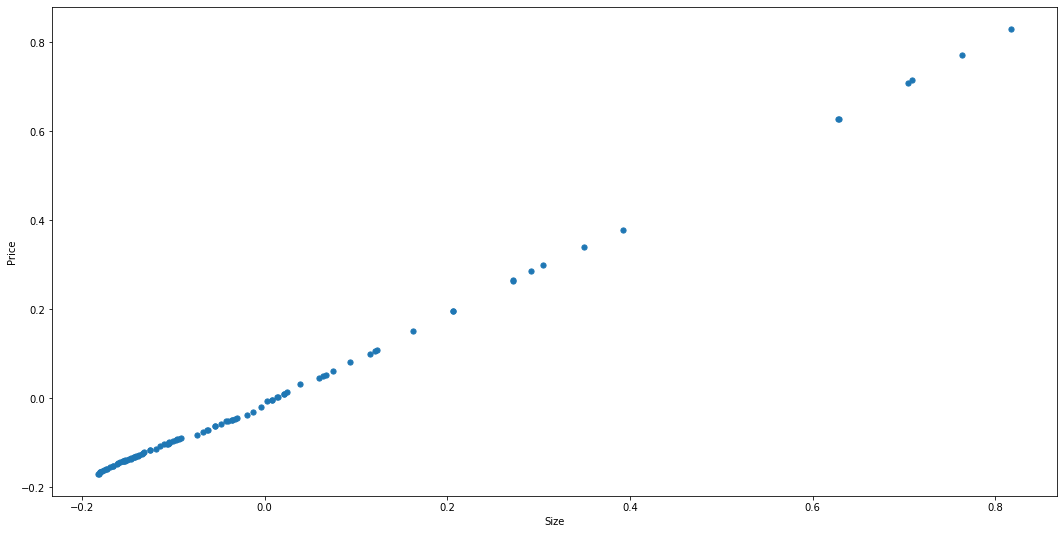

In [7]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize = (18,9), s=27)

In [8]:
data.shape

(97, 2)

Add bias column to dataset

In [10]:
# Bias
data.insert(0, 'Ones', 1)

In [11]:
data.head()

,Ones,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


Get column count

In [12]:
cols = data.shape[1]
print(cols)

3


Separate the dataset into input and output

In [13]:
x = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

Create theta with initial values

In [19]:
theta = np.matrix([0,6])

Convert input and output to matrix form

In [20]:
x = np.matrix(x)
y = np.matrix(y)

In [21]:
theta.shape, x.shape, y.shape

((1, 2), (97, 2), (97, 1))

Error function

In [22]:
def computeError(x, y, theta):
  inner = np.power(((x * theta.T) - y), 2)
  return np.sum(inner) / (2 * len(x))

Call error function

In [23]:
computeError(x, y, theta)

0.632229948179241

Plot initial model against training data

In [24]:
line_model = (x*theta.T)

Text(0.5, 1.0, 'Initial Model VS Training Data')

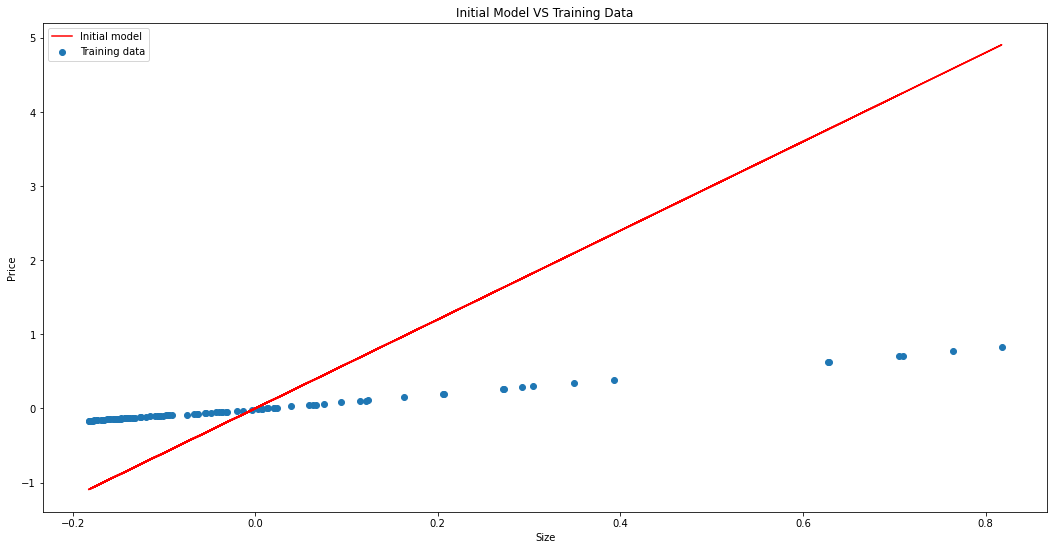

In [34]:
fig,ax = plt.subplots(figsize=(18,9)) # fig-Figuge, ax-Axes returned
ax.scatter(data.Size,data.Price,label="Training data")
ax.plot(data.Size,line_model,'r',label="Initial model") # r-red
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Initial Model VS Training Data')

Gradient descent function

In [29]:
learn_rate = 1
iters = 350

def gradientDescent(x, y, theta, learn_rate, iters):
  temp = np.matrix(np.zeros(theta.shape)) # Temporay matrix for updation
  parameters = theta.shape[1] # Number of parameters
  cost = [] # Track cost at each value

  for i in range(iters):
    error = (x*theta.T) - y 

    for j in range(parameters):
      gradient = np.multiply(error, x[:,j])
      temp[0,j] = theta[0,j] - ((learn_rate/len(x)) * np.sum(gradient))
    
    theta = temp # Simulataneously update the values of all theta values
    cost_iter = computeError(x,y,theta) #Cost for this iteration
    cost.append(cost_iter)

  return theta,cost

Calculate final theta (after all iterations in gradient descent)

In [30]:
final_theta, cost = gradientDescent(x,y,theta,learn_rate,iters)
print(final_theta)

[[2.73549797e-16 9.83386677e-01]]


In [31]:
print(cost)

[0.5703051140593283, 0.5144461382969397, 0.46405883863649905, 0.41860723605304234, 0.3776078534442059, 0.34062457279487657, 0.30726399610921057, 0.2771712607633973, 0.2500262647663031, 0.22554026177539255, 0.20345278964848332, 0.18352889985977064, 0.16555665830890753, 0.14934489093878497, 0.13472115018173123, 0.1215298806028428, 0.10963076422805514, 0.0988972279559027, 0.08921509717603063, 0.08048138127274912, 0.07260317809480772, 0.06549668573803141, 0.059086311128967735, 0.053303865927384654, 0.0480878411942848, 0.04338275310994624, 0.03913855278227096, 0.03531009386746378, 0.031856652340024195, 0.028741493303755705, 0.025931480235881325, 0.023396722507722695, 0.021110257432554895, 0.019047763458521366, 0.01718730145578885, 0.015509081345966022, 0.013995251591379688, 0.012629709304967193, 0.011397928960888653, 0.01028680788382235, 0.009284526873384125, 0.0083804244811071, 0.0075648836026426325, 0.006829229178842817, 0.0061656359175519615, 0.005567045054526774, 0.005027089268055652, 0

Plot between model price and actual price

In [44]:
final_model = x*final_theta.T

Text(0.5, 1.0, 'Final Model VS Training Data')

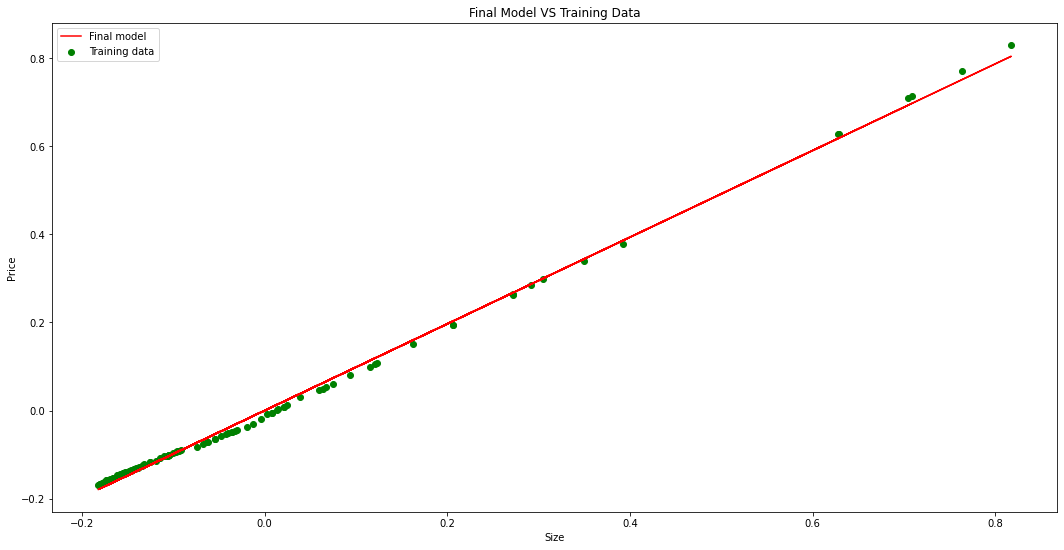

In [40]:
fig,ax = plt.subplots(figsize=(18,9)) 
ax.scatter(data.Size,data.Price,c='g',label="Training data")
ax.plot(data.Size,final_model,'r',label="Final model") 
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Final Model VS Training Data')

Compute Error and Accuracy

In [42]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(final_model, y)
Accuracy = 1 - Error

print('Error = {} %'.format(round(Error*100,2)))
print('Accuracy = {} %'.format(round(Accuracy*100,2)))

Error = 0.94 %
Accuracy = 99.06 %


Predict house price

In [48]:
def predict(final_theta, accuracy):
  size = float(input("Enter the size of house in sqft: "))
  size = (size-raw_data.Size.mean()) / (raw_data.Size.max()-raw_data.Size.min()) # Normalize size
  price = final_theta[0,0] + final_theta[0,1]*size # price is normalized
  predicted_price = price * (raw_data.Price.max()-raw_data.Price.min()) + raw_data.Price.mean() # Denormalize price
  price_at_max_accuracy = predicted_price * (1/accuracy)
  price_range = price_at_max_accuracy - predicted_price
  
  return predicted_price, price_range

In [49]:
Predicted_price, Price_range = predict(final_theta, Accuracy)
print("Your house cost is " + str(round(Predicted_price * (1/100000),2)) + " Lakhs (+ or -) " + str(round(Price_range,2)))

Enter the size of house in sqft: 900
Your house cost is 23.76 Lakhs (+ or -) 22663.54
